In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gymnasium import spaces
from gymnasium.wrappers import EnvCompatibility
from matplotlib.axes import Axes
from matplotlib.figure import Figure
import gymnasium as gym


<h1> Why E[max_a Q(a)] - max_a E[Q(a)] > 0 </h1>

It would be better to think of Q(a) as independent random variables rather than functions. In the example below, E[Q] = [5,4,3,2,1] where each entry of the vector is E[Q(a)]. Let's verify that this is the case for samples drawn for a gaussian distribution with mean 3 and variance 4.

In [28]:
Q = np.zeros((5,))
for i in range(10000):
    Q = Q + np.random.randn(5)*[1,10,10,10,10] + [5,4,3,2,1]
Q_sum = Q/10000.
Q_sum

array([4.99783592, 3.91424167, 3.09157484, 1.89699477, 1.01520983])

As can be seen from above, E[Q] = [5,4,3,2,1]. This implies max_a E[Q(a)] = 5 or argmax_a E[Q(a)] = 0th action.

In [13]:
print("max_a E[Q(a)] is",np.max(Q_sum))
print("argmax_a E[Q(a)] is",np.argmax(Q_sum))

max_a E[Q(a)] is 5.011446745052765
argmax_a E[Q(a)] is 0


<h1> Lets compute E[max_a Qhat(a)] </h1>

In [27]:
Qhat_sum = 0.
for i in range(10000):
    Qhat = np.max(np.random.randn(5)*[1,10,10,10,10] + [5,4,3,2,1])
    Qhat_sum+= Qhat
Qhat_sum/10000.

13.23564113204735

This is E[max_a Q(a)] and as can be seen, its overestimated with significant positive biase

<h1> Let's now try E[argmax_a Q2(a)] 

3.910545604635011


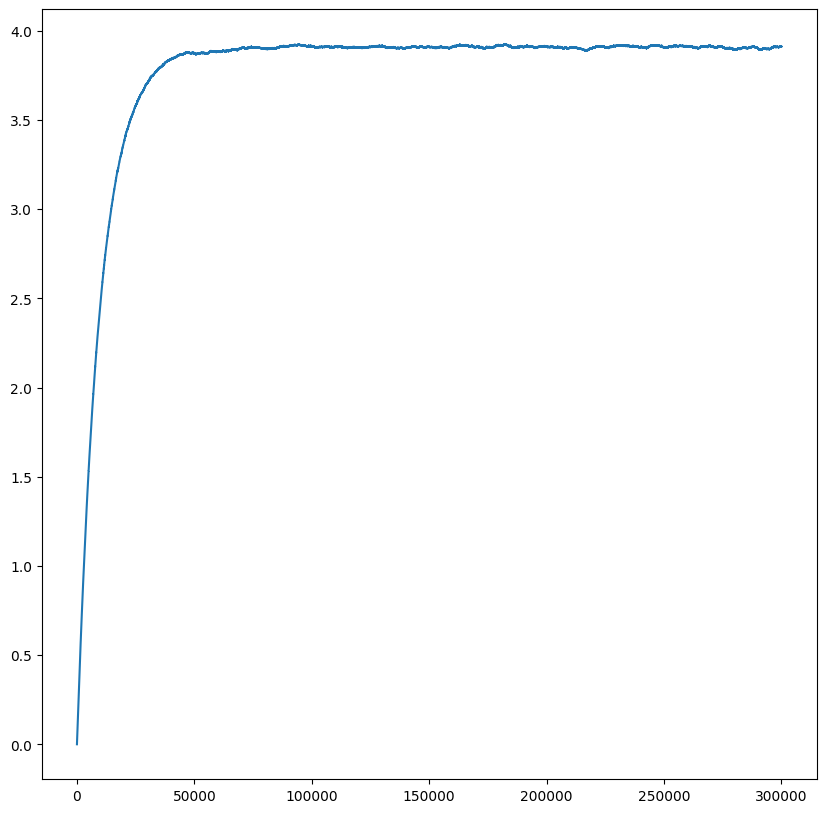

In [55]:
Qhat_sum = 0.
Qhat_plot = []
fig = plt.figure(figsize=(10,10))

for i in range(300000):
    Qhat1 = np.random.randn(5)*[1,1,1,1,1] + [4.1,4,3,2,1]
    Qhat2 = np.random.randn(5)*[1,1,1,1,1] + [4.1,4,3,2,1]
    argmax = np.argmax(Qhat1)
    Qhat_sum= Qhat_sum +  0.0001*(Qhat2[argmax] - Qhat_sum)
    Qhat_plot.append(Qhat_sum)
plt.plot(Qhat_plot)
print(Qhat_sum)